In [1]:
!pip install pyxlsb
import pandas as pd
import pyxlsb
import numpy as np

In [3]:
df = pd.read_excel("/content/stc TV Data Set_T1.xlsb")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Column1           1048575 non-null  int64 
 1   date_             1048575 non-null  int64 
 2   user_id_maped     1048575 non-null  int64 
 3   program_name      1048575 non-null  object
 4   duration_seconds  1048575 non-null  int64 
 5   program_class     1048575 non-null  object
 6   season            1048575 non-null  int64 
 7   episode           1048575 non-null  int64 
 8   program_desc      1034537 non-null  object
 9   program_genre     1048575 non-null  object
 10  series_title      1048575 non-null  int64 
 11  hd                1048575 non-null  int64 
 12  original_name     1048575 non-null  object
dtypes: int64(8), object(5)
memory usage: 104.0+ MB


In [4]:
df.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [11]:
df.columns

Index(['Column1', 'date_', 'user_id_maped', 'program_name', 'duration_seconds',
       'program_class', 'season', 'episode', 'program_desc', 'program_genre',
       'series_title', 'hd', 'original_name'],
      dtype='object')

In [14]:
df.isnull().sum()

,0
Column1,0
date_,0
user_id_maped,0
program_name,0
duration_seconds,0
program_class,0
season,0
episode,0
program_desc,14038
program_genre,0


In [15]:
df.program_desc

,program_desc
0,Drama Movie100 Streets
1,Animation MovieMoana (HD)
2,Animation MovieThe Mermaid Princess (HD)
3,Animation MovieThe Mermaid Princess (HD)
4,Biography MovieChurchill (HD)
...,...
1048570,Horror MovieExtraterrestrial (HD)
1048571,Comedy MovieThe One With The Holiday Armadillo...
1048572,Horror MovieDreams In The Witch House
1048573,Drama MovieTwo Lovers and a Bear (HD)


In [18]:
df.describe()

,Column1,date_,user_id_maped,duration_seconds,season,episode,series_title,hd
count,1.034537e+06,1.034537e+06,1.034537e+06,1.034537e+06,1.034537e+06,1.034537e+06,1.034537e+06,1.034537e+06
mean,6.286200e+05,4.301166e+04,1.707854e+04,1.233010e+03,1.334519e+00,6.165930e+00,1.222286e-02,3.842821e-01
std,3.596176e+05,1.239459e+02,1.004170e+04,6.841556e+03,2.100225e+00,1.226151e+01,1.098794e-01,4.864253e-01
min,1.000000e+00,4.280800e+04,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.188470e+05,4.289700e+04,8.251000e+03,5.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.311380e+05,4.302100e+04,1.714700e+04,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,9.401420e+05,4.312000e+04,2.566500e+04,1.330000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,1.247852e+06,4.322000e+04,3.428000e+04,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


In [16]:
df.dropna(inplace=True)

In [17]:
df.isnull().sum()

,0
Column1,0
date_,0
user_id_maped,0
program_name,0
duration_seconds,0
program_class,0
season,0
episode,0
program_desc,0
program_genre,0


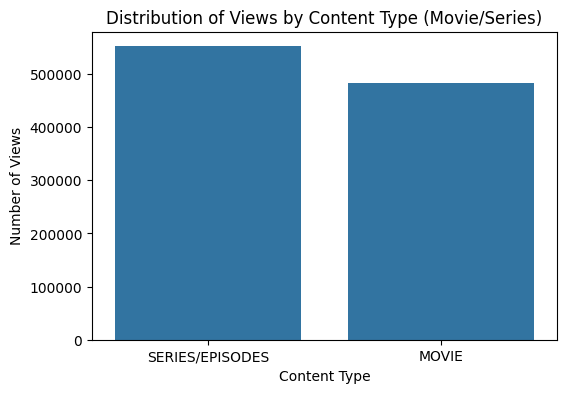

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
content_distribution = df['program_class'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=content_distribution.index, y=content_distribution.values)
plt.xlabel("Content Type")
plt.ylabel("Number of Views")
plt.title("Distribution of Views by Content Type (Movie/Series)")
plt.show()


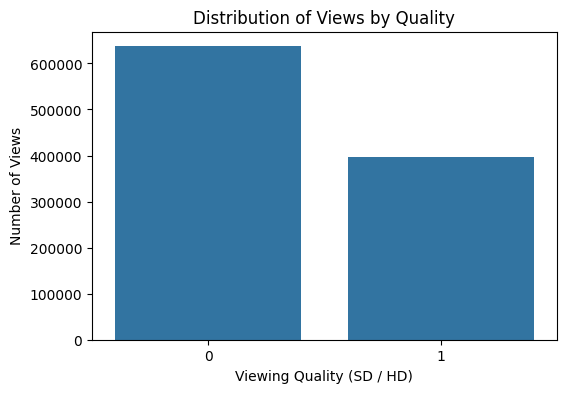

In [23]:
quality_distribution = df['hd'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=quality_distribution.index, y=quality_distribution.values)
plt.xlabel("Viewing Quality (SD / HD)")
plt.ylabel("Number of Views")
plt.title("Distribution of Views by Quality")
plt.show()

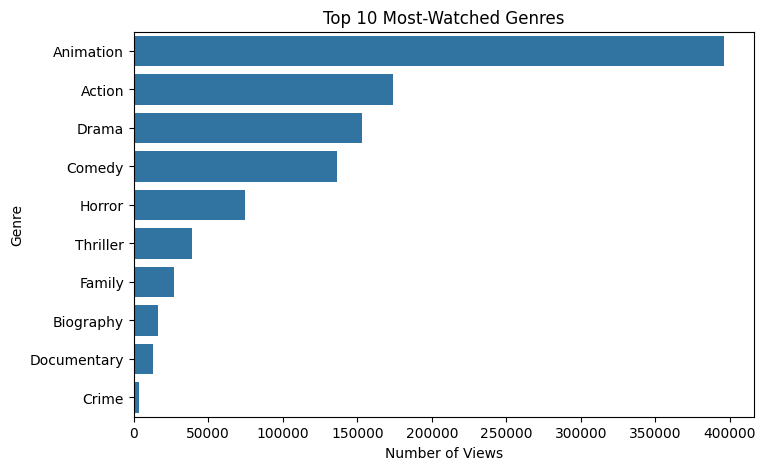

In [26]:
genre_distribution = df['program_genre'].value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=genre_distribution.values, y=genre_distribution.index)
plt.xlabel("Number of Views")
plt.ylabel("Genre")
plt.title("Top 10 Most-Watched Genres")
plt.show()